In [1]:
import numpy as np
import pandas as pd
from glob import glob

In [2]:
cns = pd.read_csv("data/translations/all_cs_clip_information.txt", sep="\t")
cns["video"] = cns["video.id"].str.split("/").str[-1].str.split(".").str[0]
cns["dir"] = cns["video.id"].str.split("/").str[-2]
cns["subdir_video"] = cns["dir"] + "_" + cns["video"]
cns.subdir_video = cns.subdir_video.str.lower()
cns.subject_id = cns.subject_id.str.lower()
cns.drop(
    columns=[
        "video.id",
        "video",
        "dir",
        "start.time",
        "site",
        "classifications",
    ],
    inplace=True,
)

cns.rename(columns={"behavior": "behaviour"}, inplace=True)
cns.tags.fillna("NaN", inplace=True)
cns.behaviour.fillna("NaN", inplace=True)
cns["tags"] = cns.tags.str.lower()
cns["behaviour"] = cns.behaviour.str.lower()
cns["bt"] = cns.behaviour.astype(str) + "," + cns.tags.astype(str)

tags_only = cns[["subdir_video", "subject_id", "tags"]]
tags_only["tags"] = tags_only.tags.str.split(",")

behaviours_only = cns[["subdir_video", "subject_id", "behaviour"]]
behaviours_only["behaviour"] = behaviours_only.behaviour.str.split(",")

bt = cns[["subdir_video", "subject_id", "bt"]]
bt["behaviour"] = bt.bt.str.split(",")

<ipython-input-2-e59bd2a5f370>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tags_only["tags"] = tags_only.tags.str.split(",")
<ipython-input-2-e59bd2a5f370>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behaviours_only["behaviour"] = behaviours_only.behaviour.str.split(",")
<ipython-input-2-e59bd2a5f370>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [3]:
csv_files = glob("data/sites/csv/**/*.csv", recursive=True)
sorted_csv_files = sorted(csv_files, key=lambda x: x.split("/")[-1])
initialiser, remainder = sorted_csv_files[0], sorted_csv_files[1:]
df = pd.read_csv(initialiser, encoding="ISO-8859-1")
for file in remainder:
    site = pd.read_csv(file, encoding="ISO-8859-1")
    df = pd.concat([df, site])
df["subdir_video"] = df.subfolder.astype(str) + "_" + df.video_file_name.astype(str)
df["subdir_video"] = df["subdir_video"].str.lower()

In [4]:
# TODO: check agreement between tags and behaviours
# TODO: check agreement between tags/behaviours and MM annotations
# TODO: remove bogus classifications (i.e., with loads of species observed)

**Creating binary indicator columns for tags and behaviours**

In [5]:
tag_df = pd.read_csv(
    "/home/dl18206/Downloads/Re_ getting back on track _)/all_tags_behaviours.csv"
)

In [6]:
for col in tag_df.columns[1:]:
    behaviours = tag_df[~tag_df[col].isna()].Tags.values
    tags_only[f"{col}_t"] = tags_only.tags.apply(
        lambda x: 1 if any(i in x for i in behaviours) else 0
    )

<ipython-input-6-348935a81482>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tags_only[f"{col}_t"] = tags_only.tags.apply(


In [7]:
tags_only.head()

,subdir_video,subject_id,tags,camera_reaction_t,tool_use_t,object_carry_t,termite_fishing_t,nut_cracking_t,stone_throw_t,bipedal_t,...,sitting_t,in_a_tree_t,tool_use_surface_t,tool_use_mound_t,night_chimps_t,off_camera_t,no_behaviour_t,swelling_t,water_t,on_the_ground_t
0,baf_vid16_0340989_1432398_20151114_12010008,60886059,[nan],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,baf_vid16_0340989_1432398_20151114_12010008,60886061,[nan],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,baf_vid16_0340989_1432398_20151114_12010008,60886060,[nan],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,baf_vid16_0340989_1432398_20151114_12010008,60886062,[nan],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,baf_vid16_0340989_1432398_20151114_12010009,60886063,"[floridpostern, chimp, 1_chimp]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
for col in tag_df.columns[1:]:
    behaviours = tag_df[~tag_df[col].isna()].Tags.values
    behaviours_only[f"{col}_b"] = behaviours_only.behaviour.apply(
        lambda x: 1 if any(i in x for i in behaviours) else 0
    )

<ipython-input-8-2dc6b009b673>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behaviours_only[f"{col}_b"] = behaviours_only.behaviour.apply(


In [9]:
behaviours_only.head()

,subdir_video,subject_id,behaviour,camera_reaction_b,tool_use_b,object_carry_b,termite_fishing_b,nut_cracking_b,stone_throw_b,bipedal_b,...,sitting_b,in_a_tree_b,tool_use_surface_b,tool_use_mound_b,night_chimps_b,off_camera_b,no_behaviour_b,swelling_b,water_b,on_the_ground_b
0,baf_vid16_0340989_1432398_20151114_12010008,60886059,[traveling],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,baf_vid16_0340989_1432398_20151114_12010008,60886061,[nan],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,baf_vid16_0340989_1432398_20151114_12010008,60886060,[nan],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,baf_vid16_0340989_1432398_20151114_12010008,60886062,[nan],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,baf_vid16_0340989_1432398_20151114_12010009,60886063,[traveling],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
for col in tag_df.columns[1:]:
    behaviours = tag_df[~tag_df[col].isna()].Tags.values
    bt[f"{col}_bt"] = bt.behaviour.apply(
        lambda x: 1 if any(i in x for i in behaviours) else 0
    )

**Are merged clfs-tags consistent with mm**

In [11]:
a_df = (
    bt.merge(df, on="subdir_video", how="left")
    .drop(columns="behaviour")
    .drop_duplicates()
)
a_df = a_df.groupby("subdir_video")[["camera_reaction", "camera_reaction_bt"]].agg(
    lambda x: list(x)
)

In [12]:
a_df["mm"] = a_df.camera_reaction.apply(lambda x: True if "yes" in x else False)
a_df["bt"] = a_df.camera_reaction_bt.apply(lambda x: True if 1 in x else False)

In [13]:
a_df["match"] = a_df.apply(lambda x: x["mm"] == x["bt"], axis=1)

In [14]:
a_df[~a_df.match == True]

,camera_reaction,camera_reaction_bt,mm,bt,match
subdir_video,,,,,
baf_vid10_0346467_1436892_20151227_01080034,"[nan, nan, nan, nan]","[1, 0, 0, 0]",False,True,False
baf_vid11_0343264_1434832_20151019_12100066,"[no, no, yes, no, no, yes, no, no, yes, no, no...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",True,False,False
baf_vid13_0343242_1434854_20150910_10070021,"[no, no, no, no]","[1, 0, 0, 0]",False,True,False
baf_vid13_0343242_1434854_20160415_04170015,"[nan, nan, nan, nan]","[1, 0, 0, 0]",False,True,False
baf_vid13_0345506_1436561_20150216_02170022,"[nan, nan, nan, nan]","[1, 0, 0, 0]",False,True,False
...,...,...,...,...,...
uga_viduppb_230869_9392585_20141028_pict0032,"[no, no, no, no, no, no, no, no]","[0, 0, 0, 0, 1, 1, 0, 0]",False,True,False
uga_viduppc_230029_9392405_20140113_pict0007,"[no, no, no, no, no, no, no, no, no, no, no, no]","[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]",False,True,False
uga_viduppc_230029_9392405_20141028_pict0011,"[no, no, no, no]","[0, 0, 1, 1]",False,True,False


**GPT output**

In [15]:
non_timestamped = "The video captures a scene in the dense forests of the Democratic Republic of Congo (DRC), \
specifically at the Bili research site. The focus is on a group of Pan troglodytes schweinfurthii, commonly known \
as chimpanzees. Within this lush habitat with a mixed and open understorey, two adult chimps, one male and one female, \
are observed engaging in a variety of intriguing behaviors. The female chimp is seen carrying a young chimp on her back, \
demonstrating maternal care. Meanwhile, the male chimp is playing on the ground, showing a playful and carefree attitude. \
The group's social interactions are evident as they interact with one another while also traveling along a trail within the forest. \
The video provides a captivating glimpse into the dynamic and diverse behaviors of these chimpanzees in their natural \
environment at Bili."

In [ ]:
timestamped = "In the heart of the Democratic Republic of Congo's lush Bili research site, a remarkable \
scene unfolds in the forest habitat inhabited by Pan troglodytes schweinfurthii, \
commonly known as chimpanzees. The video provides a unique glimpse into the lives of these primates as they engage in a series of \
distinct behaviors within a span of one minute. In the initial 15 seconds, a chimpanzee is observed carrying an object, showcasing \
their resourceful nature. Subsequently, from 15 to 30 seconds, another chimp can be seen carrying a young one on the ground, \
displaying tender maternal care. As the seconds tick on, the chimps switch to a playful mode from 30 to 45 seconds, \
engaging in joyful interactions that underscore their social dynamics. The video concludes with a sense of movement and exploration, \
as they traverse the forest trail together. This captivating footage encapsulates a range of behaviors, offering a brief \
yet insightful window into the fascinating world of chimpanzee behavior at the Bili research site."

**Merge behaviours only with MM**

In [82]:
tmp_df = df[["subdir_video", "behavioral_context", "camera_reaction"]]
merged_df = (
    behaviours_only.groupby("subdir_video")[behaviours_only.columns[1:]]
    .agg(lambda x: True if 1 in list(x) else False)
    .merge(tmp_df, on="subdir_video", how="left")
    .drop_duplicates()
)

In [64]:
same = pd.DataFrame(
    {
        "subject_id": behaviours_only.subject_id.values,
        "behaviours": behaviours_only.tool_use_b.values,
        "tags": tags_only.tool_use_b.values,
    }
)

In [65]:
same["match"] = same.apply(lambda x: x["behaviours"] == x["tags"], axis=1)

In [66]:
same[(same.match == False) & (same.subject_id.str.startswith("acp"))]

,subject_id,behaviours,tags,match
17566,acp000086v,0,1,False
17859,acp000b67y,1,0,False
18332,acp000b3dw,1,0,False
18807,acp000baba,1,0,False
18877,acp000bb7a,1,0,False
...,...,...,...,...
33739,acp0004tb8,0,1,False
33741,acp0004tba,0,1,False
33751,acp0004tho,0,1,False
33753,acp0004thq,0,1,False


**Dist**

<AxesSubplot:title={'center':'Number of annotations per behaviour'}>

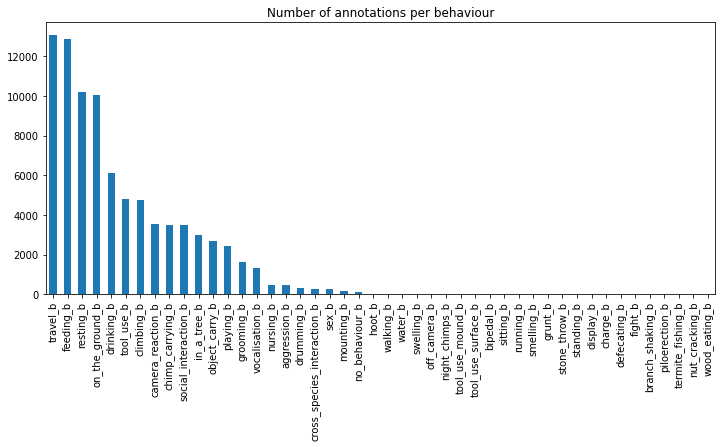

In [27]:
tag_counts = tags_only[tags_only.columns[2:]].sum(axis=0).sort_values(ascending=False)

behaviour_counts = (
    behaviours_only[behaviours_only.columns[2:]]
    .sum(axis=0)
    .sort_values(ascending=False)
)

tag_counts.plot(
    kind="bar", figsize=(12, 5), title="Number of annotations per behaviour"
)
behaviour_counts.plot(
    kind="bar", figsize=(12, 5), title="Number of annotations per behaviour"
)